# Support Vector Machine

The purpose of this notebook is to predict whether an applicant is approved for a loan using a Support Vector Machine. The original dataset and definition of the problem corresponds to the following [Kaggle](https://www.kaggle.com/competitions/playground-series-s4e10/overview) competition, which we need to submit and participate as well.

In [48]:
import pandas as pd

pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12)
plt.rc('figure', figsize=(12, 5))

import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': [u'times']})

In [50]:
train_set = pd.read_csv('./dataset/train.csv', index_col=0)
test_set = pd.read_csv('./dataset/test.csv', index_col=0)

# Data Exploration

The first step to any machine learning project is explore the data, so that we can know what we are working with. That process will help us in the future to decide how we can process and use this data.

In [51]:
print(train_set.shape[0])
print(test_set.shape[0])

58645
39098


In [52]:
train_set.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [53]:
train_set.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [6]:
train_set.select_dtypes(include=['object']).head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
id,,,,
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N


The previous cells allow us to see some of the properties from the dataset, such as the relation between the test and train size, the amount of columns and the type of datatypes in the dataset. This dataset contains 4 columns that use categorical datatypes, we will probably need to One-hot encode them in the future.

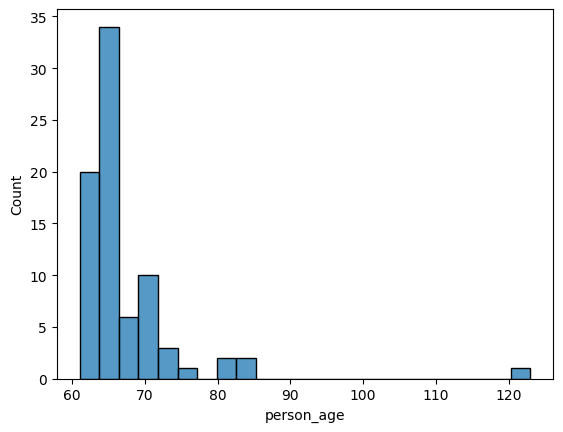

In [13]:
sns.histplot(train_set[train_set['person_age'] > 60]["person_age"])
plt.show()